# Welcome

##### In this notebook we are building various Supervised and Unsupervised Machine Learning models from scratch in Python.
##### We will then generate some dummy dataset and will train our model on that data set along with the scikit learn implemented models.
##### After that we will compare both the accuracies. 

#### Checking all the installed packages.

In [55]:
# !pip install numpy
# !pip install pandas
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install sklearn
# !pip install tensorflow
# !pip install keras
# !pip install pickle
# !pip install joblib
# !pip install streamlite

#### Importing the libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import seaborn as sns
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

#### Building the Linear Regression class.
###### You can read more about Linear Regression here.
###### https://en.wikipedia.org/wiki/Linear_regression

In [57]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Number of training samples and features
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iters):
            # Calculate predictions
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


#### Building the L1/Lasso Regression.
###### You can read more about Lasso Regression here.
###### https://en.wikipedia.org/wiki/Lasso_(statistics)

In [58]:
class LassoRegression:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # Compute gradients
            y_predicted = np.dot(X, self.weights) + self.bias
            d_weights = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            d_bias = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights with L1 regularization
            self.weights -= self.learning_rate * (d_weights + self.lambda_param * np.sign(self.weights))
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

#### Building the Ridge Regression class.
###### You can read more about Ridge Regression here.
###### https://en.wikipedia.org/wiki/Ridge_regression

In [59]:
class RidgeRegression:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # Compute gradients
            y_predicted = np.dot(X, self.weights) + self.bias
            d_weights = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + 2 * self.lambda_param * self.weights
            d_bias = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights with L2 regularization
            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [60]:
# Evaluate the model
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#### Creating the dataset

In [61]:
# Generate some data for testing
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# Reshape y to be a flat array
y = y.reshape(-1)

#### Splitting the data

In [62]:
# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#### Data Visulization

In [63]:
df = pd.DataFrame(X_train)
df.head()

,0
0,0.749080
1,1.901429
2,1.463988
3,1.197317
4,0.312037


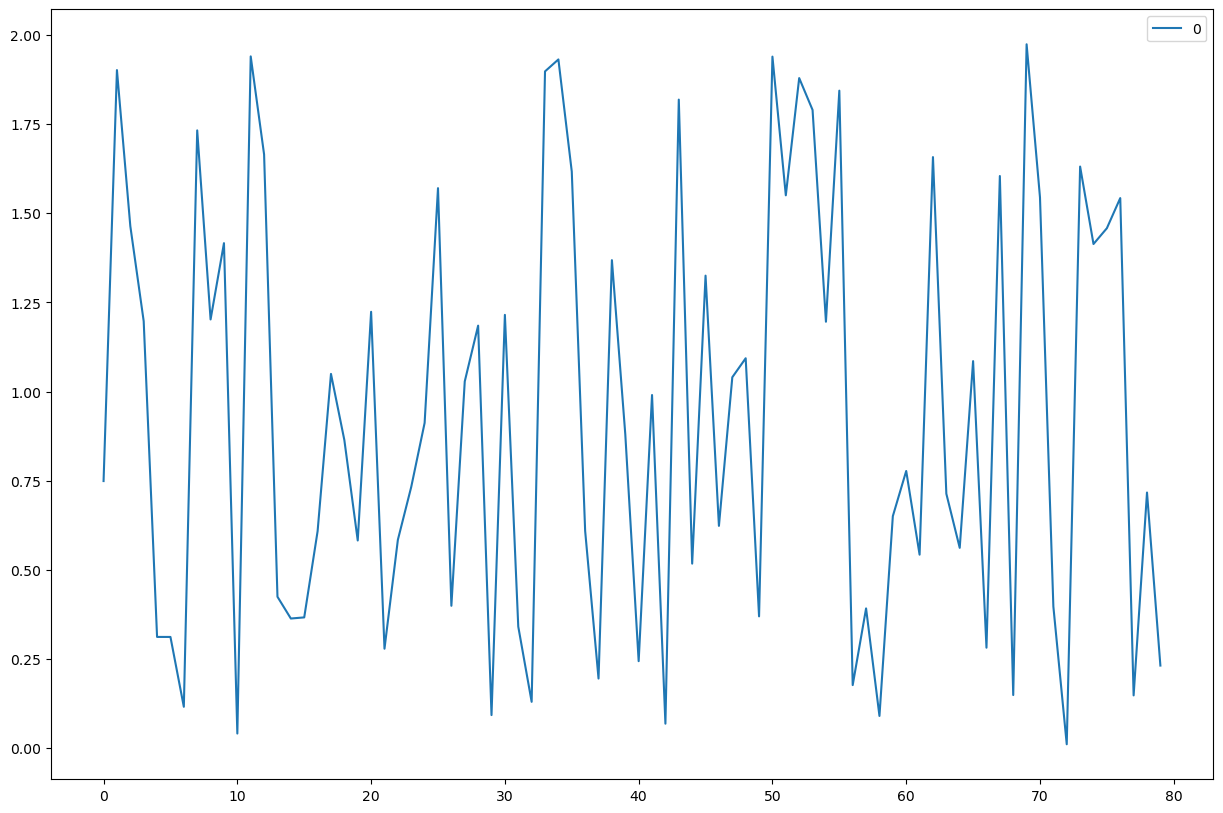

In [64]:
plt.figure(figsize= (15, 10))
sns.lineplot(df)
plt.show()

#### Training the model.
###### Creating dictionary to store modelname and accuracy

In [65]:
my_dict = {}

#### Linear Regression

In [66]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

accuracy = mean_squared_error(y_test, predictions)

my_dict['my_linear_regression'] = accuracy

In [67]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

accuracy = mean_squared_error(y_test, predictions)

my_dict['SK-Learn_linear_regression'] = accuracy

#### Lasso Regression

In [68]:
regressor = LassoRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

accuracy = mean_squared_error(y_test, predictions)

my_dict['my_lasso_regression'] = accuracy

In [69]:
from sklearn.linear_model import Lasso

regressor = Lasso(alpha=0.1)
regressor.fit(X_test, y_test)

predictions = regressor.predict(X_test)

accuracy = mean_squared_error(y_test, predictions)

my_dict['SK-Learn_lasso_regression'] = accuracy

#### Ridge Regression

In [70]:
regressor = RidgeRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

accuracy = mean_squared_error(y_test, predictions)

my_dict['my_ridge_regression'] = accuracy

In [71]:
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=0.1)
regressor.fit(X_test, y_test)

predictions = regressor.predict(X_test)

accuracy = mean_squared_error(y_test, predictions)

my_dict['SK-Learn_ridge_regression'] = accuracy

#### Plotting the accuracy of My Model along with SK-Learn Models

In [72]:
# Create Bar chart
fig = go.Figure(data=[go.Bar(
    x=list(my_dict.keys()), # get keys for x-axis
    y=list(my_dict.values()), # get values for y-axis
    marker_color=(00, 1, 2, 3, 4, 5)
)])

# Customize aspect
fig.update_layout(title_text='Category Counts', xaxis_title="Category", yaxis_title="Count")

fig.show()

## Thank You 